In [ ]:
import numpy as np
import scipy.io
import scipy.linalg
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from SSA_lib import SSA
from scipy.stats import spearmanr

In [ ]:
# %matplotlib notebook

In [ ]:
def MakeStationary(ts):
    new_ts = []
    for i in range(1, len(ts)):
        new_ts.append(ts[i] - ts[i - 1])
    return np.array(new_ts)

In [ ]:
def HankelMatrix(X, L):
    N = X.shape[0]
    return scipy.linalg.hankel(X[ : N - L + 1], X[N - L : N])

In [ ]:
def MeanTrajByPeriod(tr, T):
    tr_mean = np.zeros((T + 1, tr.shape[1]))
    for t in range(T):
        tr_mean[t] = np.mean(tr[t::T], axis=0)
    
    tr_mean[-1] = np.copy(tr_mean[0])
    return tr_mean

In [ ]:
def Svd(H, verbose=False):
    U, s, VT = np.linalg.svd(H)
    if verbose:
        print(s[:5])
    return U, s, VT

def Projection(U, s, V):
    print(U.shape, s.shape, V.shape)
    L = V.shape[1]
    S = np.zeros((U.shape[0], L))
    S[:L, :L] = np.diag(s)
    
    return U.dot(S)


# def CCM(H):
#     svd_data = Svd(H, verbose=False)
#     Pr = Projection(*svd_data)
#     return Pr

In [ ]:

plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

### Акселерометр

In [ ]:
mat_wlk = scipy.io.loadmat('data/acc_wlk.mat')['sensor_readings']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(np.hstack((mat_wlk[:, 0][:, np.newaxis], mat_wlk[:, 3][:, np.newaxis])))

x = scaled_data[:, 0]
y = scaled_data[:, 1]

Hx = HankelMatrix(x, L=200)
Hy = HankelMatrix(y, L=200)

pca = PCA(n_components=3)
x_3d = pca.fit_transform(Hx)
y_3d = pca.fit_transform(Hy)

In [ ]:
x_3d.shape

(2201, 3)

In [ ]:
# %matplotlib notebook

In [ ]:
x_mean = MeanTrajByPeriod(x_3d[:500], 46)

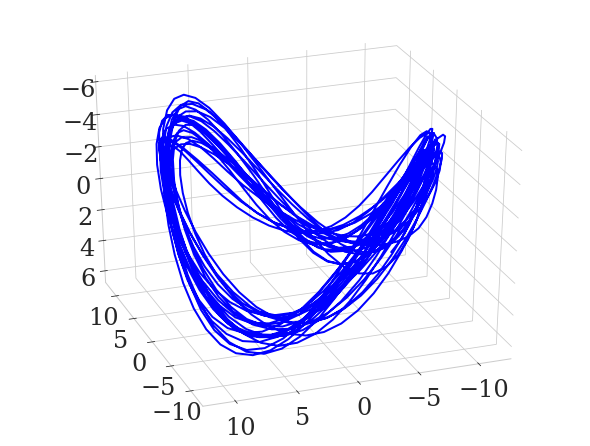

In [ ]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
# ax.scatter(x_3d[:, 0], x_3d[:, 1], x_3d[:, 2], cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.plot3D(x_3d[:1000, 1], x_3d[:1000, 0], x_3d[:1000, 2], c = 'b')
ax.plot3D(x_mean[:, 1], x_mean[:, 0], x_mean[:, 2], c='', linewidth=2)

ax.set_facecolor((1.0, 1.0, 1.0))
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

# ax.set_title("Акселерометр, ходьба", size=16)

# plt.savefig('acc_tr_1_new.png', bbox_inches='tight')

In [ ]:
y_mean = MeanTrajByPeriod(y_3d[:500], 93)

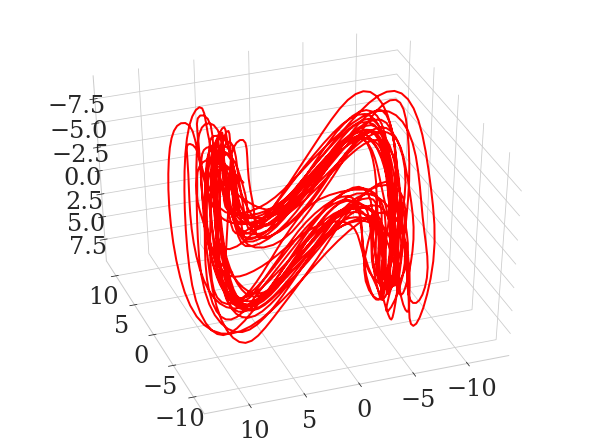

In [ ]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-140, azim=110)
# ax.scatter(x_3d[:, 0], x_3d[:, 1], x_3d[:, 2], cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.plot3D(y_3d[:, 0], y_3d[:, 1], y_3d[:, 2], c='r')
ax.plot3D(y_mean[:, 0], y_mean[:, 1], y_mean[:, 2], c='r', linewidth=2)


ax.set_facecolor((1.0, 1.0, 1.0))
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

# ax.set_title("Гироскоп, ходьба", size=16)

# plt.savefig('gyr_tr_1_new.png', bbox_inches='tight')

In [ ]:
pca = PCA(n_components=2)
x_2d = pca.fit_transform(Hx)
y_2d = pca.fit_transform(Hy)

In [ ]:
x_mean = MeanTrajByPeriod(x_2d[:500], 46)

Text(0, 0.5, '2nd eigenvector')

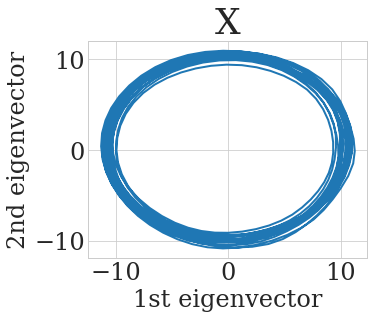

In [ ]:
fig = plt.figure(1, figsize=(5, 4))

plt.plot(x_2d[:800, 0], x_2d[:800, 1])
# plt.plot(x_mean[:, 0], x_mean[:, 1], c='r', linewidth=2)

plt.title("X")
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")

# plt.savefig('pictures/accelerometer_2d_wlk_traj_with_mean.eps', bbox_inches='tight')

In [ ]:
y_mean = MeanTrajByPeriod(y_3d[:1300], 93)

Text(0, 0.5, '2nd eigenvector')

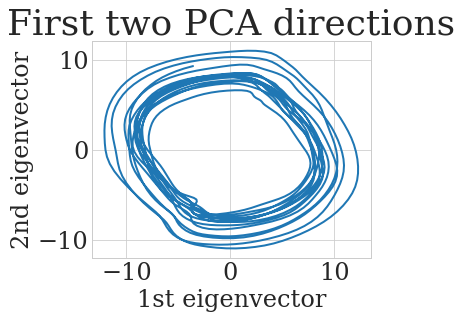

In [ ]:
fig = plt.figure(1, figsize=(5, 4))

plt.plot(y_2d[0:1300, 0], y_2d[0:1300, 1])
# plt.plot(y_mean[:, 0], y_mean[:, 1], c='r', linewidth=2)

plt.title("First two PCA directions")
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")

# plt.savefig('pictures/accelerometer_2d_ups_traj_with_mean.eps', bbox_inches='tight')

Text(0.5, 1.0, 'Гироскоп')

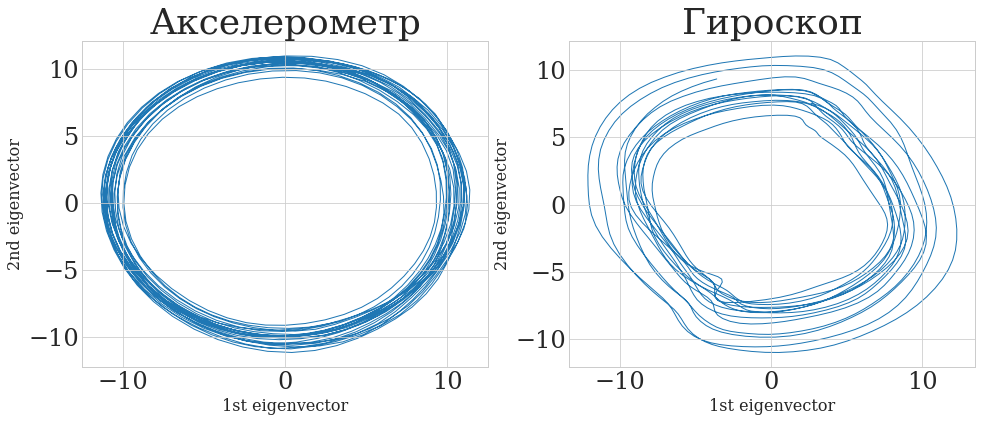

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].plot(x_2d[:1000, 0], x_2d[:1000, 1], zorder=0, lw=1)
# ax[0].plot(x_mean[:, 0], x_mean[:, 1], c='r', linewidth=2)
ax[0].set_xlabel("1st eigenvector", fontsize=16)
ax[0].set_ylabel("2nd eigenvector", fontsize=16)
ax[0].set_title("Акселерометр")

ax[1].plot(y_2d[:1300, 0], y_2d[:1300, 1], zorder=0, lw=1)
# ax[1].plot(y_mean[:, 0], y_mean[:, 1], c='r', linewidth=2)
ax[1].set_xlabel("1st eigenvector", fontsize=16)
ax[1].set_ylabel("2nd eigenvector", fontsize=16)
ax[1].set_title("Гироскоп")


# plt.savefig('pictures/acclerometer_is_connected_2d.eps', bbox_inches='tight')

In [ ]:
import knn
import importlib
knn = importlib.reload(knn)

In [ ]:
def CCM(ts, L, t, n_neighbors):
    H = knn.HankelMatrix(ts, L)
    svd_data = knn.Svd(H, verbose=False)
    knn_idx = knn.FindKnnIdx(H, t=t, n_neighbors=n_neighbors)
    Pr = knn.Projection(*svd_data)
    return knn_idx, Pr

In [ ]:
# X_knn_idx, Y_knn_idx, Pr_x, Pr_y = CCM(X, Y, L=170, t_x=400, t_y=400, n_neighbors=19)
X_knn_idx, Pr_x = CCM(x, L=200, t=150, n_neighbors=24)
Y_knn_idx, Pr_y = CCM(y, L=200, t=150, n_neighbors=19)

(2201, 2201) (200,) (200, 200)
(2201, 2201) (200,) (200, 200)


#### Зависимость Y от X, находим соседей по X

In [ ]:
L = 200

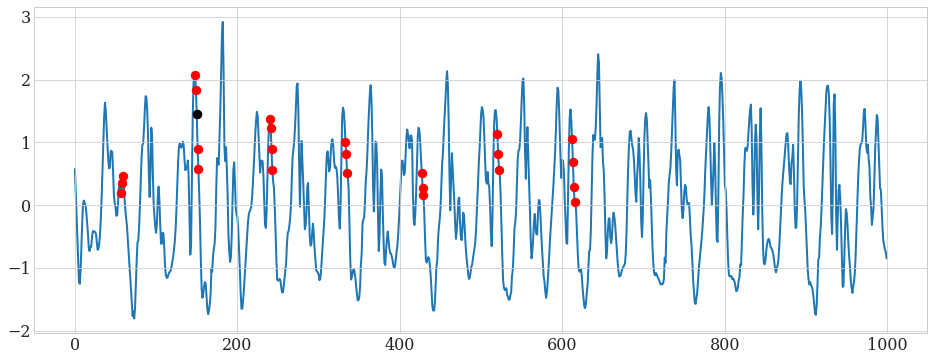

In [ ]:
knn.PlotTsWithKnn(x, X_knn_idx, t_max=1000, savefig=False)

In [ ]:
X_knn_idx

array([150, 151, 149, 242, 521, 241, 614, 428, 520, 613,  58, 522, 243,
       427, 429,  57, 615, 334, 240, 335,  59, 152, 148, 612, 333])

In [ ]:
Pr_y[:, 0] = Pr_y[:, 0] * (-1)
Pr_x[:, 1] = Pr_x[:, 1] * (-1)

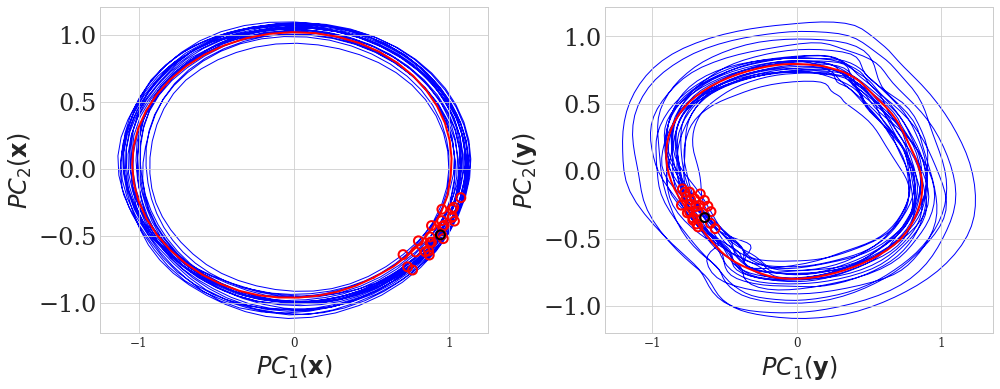

In [ ]:
# i_list=[0, 3, 15]
knn.PlotKnnOnPhaseTrajectories([(Pr_x / 10,X_knn_idx, '$\mathbf{x}$', [0, 1], [0, 1000]),
                                (Pr_y / 10, X_knn_idx, '$\mathbf{y}$', [0, 1], [0, 2200])],
                              [x_mean / 10, y_mean / 10],
                               savefig=False,
                               filename='/content/knn.png', 
                               i_list=[], xticks_size=24,
                               xticks=[['$PC_1(\mathbf{\mathbf{x}})$', "$PC_2(\mathbf{\mathbf{x}})$"], 
                                       ["$PC_1(\mathbf{\mathbf{y}})$", "$PC_2(\mathbf{\mathbf{y}})$"]])

#### Зависимость X от Y, находим соседей по Y

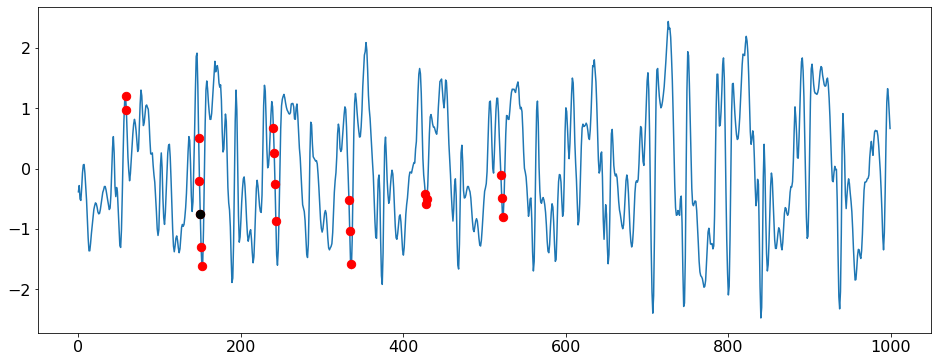

In [ ]:
knn.PlotTsWithKnn(y, Y_knn_idx, t_max=1000, savefig=False, 
              filename='../text/pictures/energy_temp/Y_knn_L'+ str(L) + '.eps')

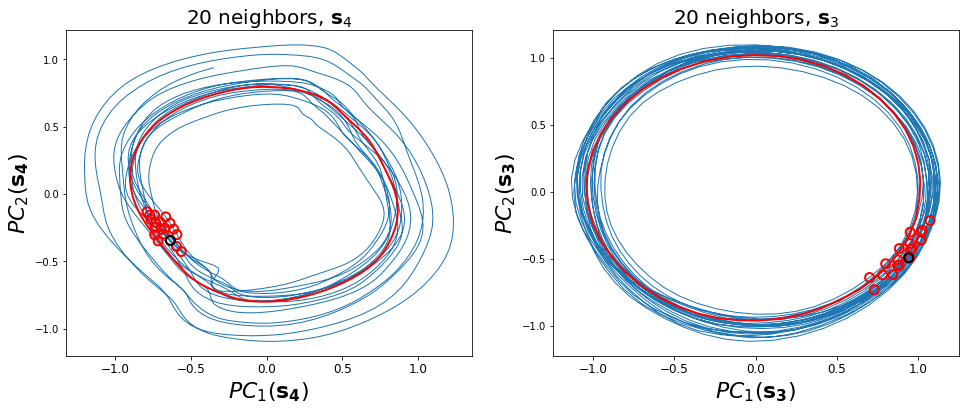

In [ ]:
# i_list=[0, 6, 16]
knn.PlotKnnOnPhaseTrajectories([(Pr_y / 10, Y_knn_idx, '$\mathbf{s}_4$', [0, 1], [0, 1300]), 
                                (Pr_x / 10, Y_knn_idx, '$\mathbf{s}_3$', [0, 1], [0, 1000])], 
                               [y_mean / 10, x_mean / 10],
                               savefig=False, 
                               filename='pictures/accelerometer_wlk_ccm_y.eps',
                               i_list=[],
                               xticks=[['$PC_1(\mathbf{\mathbf{s}_4})$', "$PC_2(\mathbf{\mathbf{s}_4})$"], 
                                       ["$PC_1(\mathbf{\mathbf{s}_3})$", "$PC_2(\mathbf{\mathbf{s}_3})$"]])

In [ ]:
Hx = HankelMatrix(x, L=200)
Hy = HankelMatrix(y, L=200)

pca = PCA(n_components=3)
x_3d = pca.fit_transform(Hx)
y_3d = pca.fit_transform(Hy)

In [ ]:
x_3d.shape

(2201, 3)

In [ ]:
x_mean = MeanTrajByPeriod(x_3d[:500], 46)

In [ ]:
# %matplotlib notebook

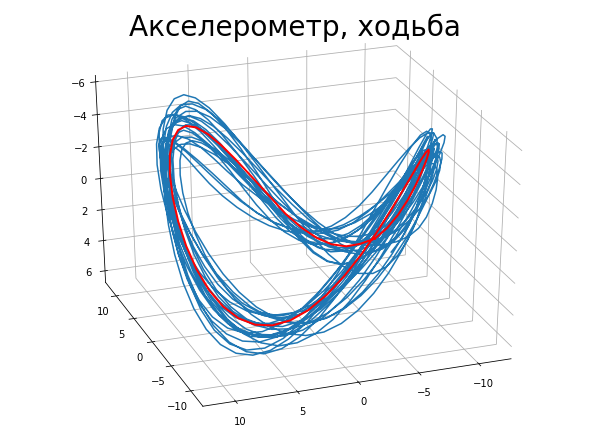

In [ ]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.plot3D(x_3d[:1000, 1], x_3d[:1000, 0], x_3d[:1000, 2])
ax.plot3D(x_mean[:, 1], x_mean[:, 0], x_mean[:, 2], c='r', linewidth=2)

ax.set_title("Акселерометр, ходьба", size=28)

ax.set_facecolor((1.0, 1.0, 1.0))
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

# plt.savefig('pictures/accelerometer_3d_wlk_traj_with_mean_title.pdf', bbox_inches='tight')
# plt.savefig('../diplom/presentation/pictures/accelerometer_3d_wlk_traj_with_mean_title.pdf', bbox_inches='tight')

### Построение прогноза PLS, связанные сигналы

In [ ]:
from sklearn.cross_decomposition import PLSRegression

from sklearn.metrics import mean_squared_error as mse

In [ ]:
def HankelMatrix_reverse(X):
    return np.hstack((X[:,0], X[-1][1:]))

def MSE(x, y):
  return np.mean((x - y)**2)

def MAPE(x, y):
  return 100*np.mean(np.abs((x - y)/x))

In [ ]:
mat_wlk = scipy.io.loadmat('data/acc_wlk.mat')['sensor_readings']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(np.hstack((mat_wlk[:, 0][:, np.newaxis], mat_wlk[:, 3][:, np.newaxis])))

x = scaled_data[:, 0]
y = scaled_data[:, 1]


x_max = x.max()
x_min = x.min()

y_max = y.max()
y_min = y.min()

x = (x - x_min)/(x_max - x_min)
y = (y - y_min)/(y_max - y_min)

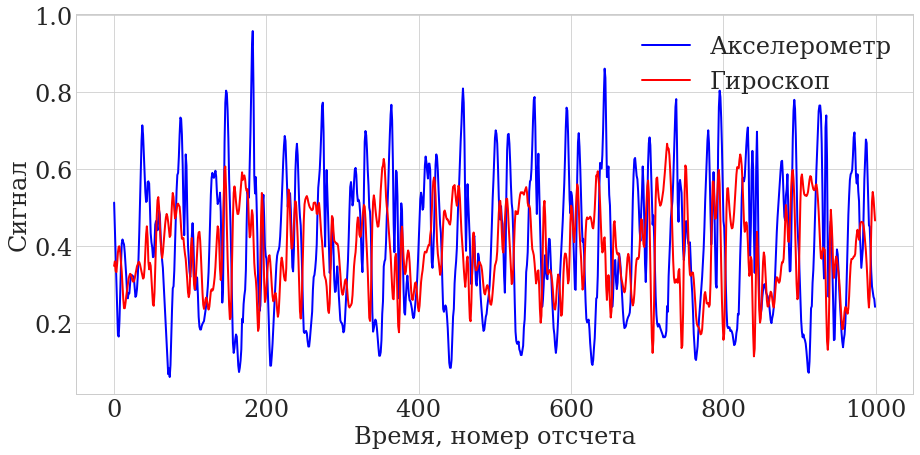

In [ ]:
plt.figure(figsize=(15,7))
# plt.title("Данные мобильного устройства")
plt.plot(np.arange(len(x[:1000])), x[:1000], label = 'Акселерометр', c='b')
plt.plot(np.arange(len(y[:1000])), y[:1000], label = 'Гироскоп', c='r')
plt.xlabel("Время, номер отсчета")
plt.ylabel("Сигнал")
plt.legend()
plt.savefig('acc+gyr_new.png')
plt.show()

In [ ]:
x_train = HankelMatrix(x[:1800], 200)
y_train = HankelMatrix(y[:1800], 200)
x_test = HankelMatrix(x[1800:], 200)
y_test = HankelMatrix(y[1800:], 200)

In [ ]:
pls = PLSRegression(n_components=30, max_iter=20000).fit(x_train, y_train)

In [ ]:
y_pred = pls.predict(x_test)
y_pred_ts = HankelMatrix_reverse(y_pred)

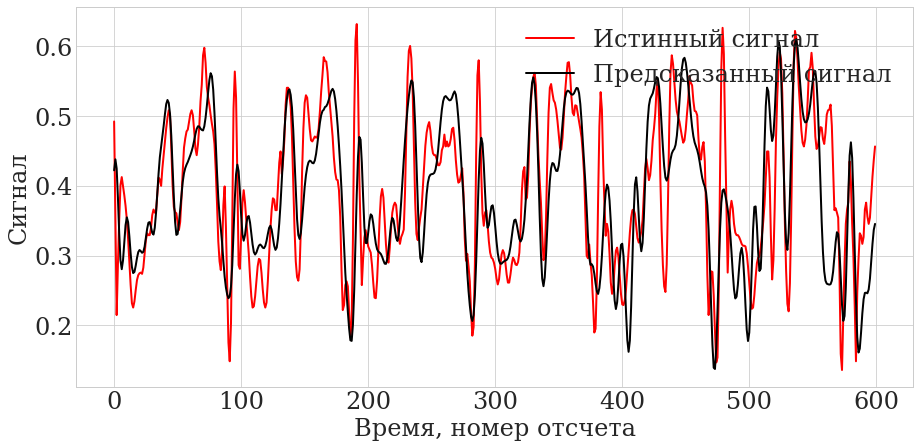

In [ ]:
plt.figure(figsize=(15,7))
# plt.title("Предсказывание сигнала гироскопа, зависимые сигналы")
plt.plot(np.arange(len(y[1800:])), y[1800:], label = 'Истинный сигнал', c='r')
plt.plot(np.arange(len(y_pred_ts)), y_pred_ts, label = 'Предсказанный сигнал', c='k')
plt.xlabel("Время, номер отсчета")
plt.ylabel("Сигнал")
plt.legend(loc='upper right')
# plt.savefig('corr_new.png')
plt.show()

In [ ]:
MSE(y[1800:], y_pred_ts)

0.006105911473873122

In [ ]:
mse(y[1800:], y_pred_ts)

0.006105911473873122

In [ ]:
MAPE(y[1800:], y_pred_ts)

16.83486041071794

In [ ]:
ERROR = []
for n in range(2, 50):
  pls = PLSRegression(n_components=n, max_iter=20000).fit(x_train, y_train)
  y_pred = pls.predict(x_test)
  y_pred_ts = HankelMatrix_reverse(y_pred)
  ERROR.append(MSE(y_pred_ts, y[1800:]))

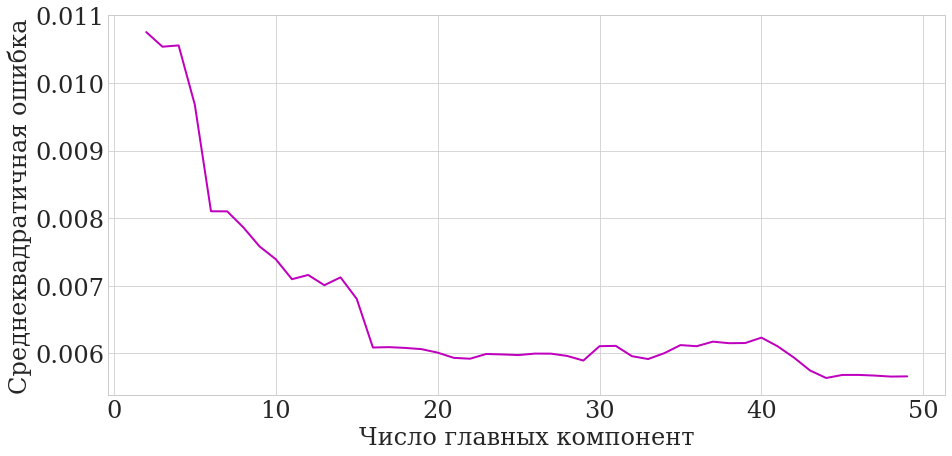

In [ ]:
plt.figure(figsize=(15,7))
# plt.title("Зависимость ошибки прогноза от числа компонент")
plt.plot([n for n in range(2, 50)], ERROR, c='m')
plt.xlabel("Число главных компонент")
plt.ylabel("Среднеквадратичная ошибка")
plt.savefig('ERROR_new.png')
plt.show()

In [ ]:
for i in range(0, 600, 60):
  print('Pearson', np.corrcoef(y[1800+i:1800+i+60], y_pred_ts[i:i+60])[0][1])

Pearson 0.7695601950664948
Pearson 0.8031750445341507
Pearson 0.7273655469187343
Pearson 0.6304951342596624
Pearson 0.7011658180783384
Pearson 0.8815139395139326
Pearson 0.6703905657122827
Pearson 0.697789438713556
Pearson 0.7756013814872919
Pearson 0.6240772748566356


In [ ]:
for i in range(0, 600, 60):
  print('Spearman', spearmanr(y[1800+i:1800+i+60], y_pred_ts[i:i+60])[0])

Spearman 0.7406810515346203
Spearman 0.7743970224251531
Spearman 0.7068093658206052
Spearman 0.5120738062086962
Spearman 0.6446862048192336
Spearman 0.8342179149224697
Spearman 0.600561299137925
Spearman 0.5051406032030878
Spearman 0.6865281883307442
Spearman 0.6311416272707631


### Построение PLS, несвязанные сигналы

In [ ]:
def prepare_time_series(_dir, centred = True):
    data = pd.read_csv(_dir, delimiter =',', decimal='.')
    
    # frequency = len(data)/(data['time'].values[-1]-data['time'].values[0])
    
    # assert 490 < frequency < 510, f'Bad frequency {frequency}'

    _x = ( (data['x'].values)**2 + (data['y'].values)**2 + (data['z'].values)**2)**.5
    
    if centred:
        _m = np.mean(_x)
        _x = (_x-_m)
        
    # _t = (data['time'].values).astype(float).reshape([-1,])

    # _t = np.linspace(0,_t[-1]-_t[0],len(_x))
        
    return _x #,_t

In [ ]:
x_acc = prepare_time_series('https://raw.githubusercontent.com/Intelligent-Systems-Phystech/Kurdyukova-BS-Thesis/master/code/data/Accelerometer.csv')

x_acc = x_acc[50:2450]

x_acc_max = x_acc.max()
x_acc_min = x_acc.min()

x_acc = (x_acc - x_acc_min)/(x_acc_max - x_acc_min)

scaler = StandardScaler()

scaled_data = scaler.fit_transform(x_acc[:, np.newaxis])

x_acc = scaled_data[:,0]

mat_wlk = scipy.io.loadmat('data/acc_wlk.mat')['sensor_readings']

scaled_data = scaler.fit_transform(np.hstack((mat_wlk[:, 0][:, np.newaxis], mat_wlk[:, 3][:, np.newaxis])))

x = scaled_data[:, 0]

x_max = x.max()
x_min = x.min()

x = (x - x_min)/(x_max - x_min)



In [ ]:
y_train2 = HankelMatrix(x_acc[:1800], 200)
y_test2 = HankelMatrix(x_acc[1800:], 200)

x_train = HankelMatrix(x[:1800], 200)
x_test = HankelMatrix(x[1800:], 200)

In [ ]:
pls2 = PLSRegression(n_components=30, max_iter=20000).fit(x_train, y_train2)

In [ ]:
y_pred2 = pls2.predict(x_test)
y_pred2_ts = HankelMatrix_reverse(y_pred2)

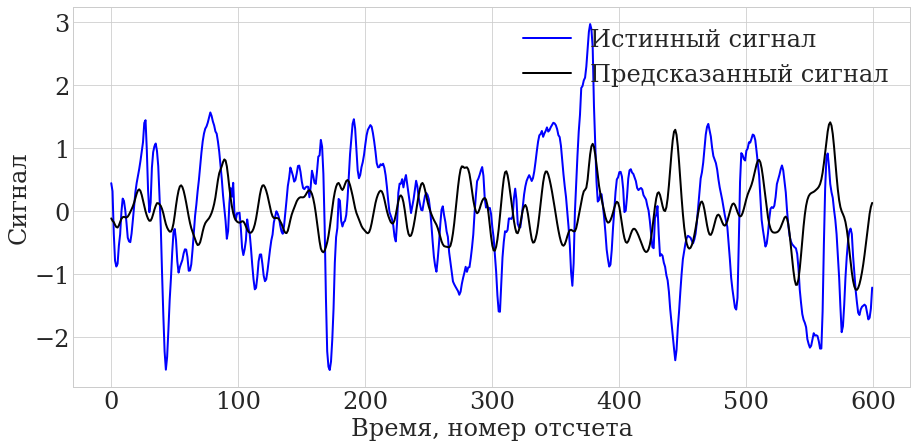

In [ ]:
plt.figure(figsize=(15,7))
# plt.title("Предсказывание сигнала, несвязанные ряды")
plt.plot(np.arange(len(x_acc[1800:])), x_acc[1800:], label = 'Истинный сигнал', c='b')
plt.plot(np.arange(len(y_pred2_ts)), y_pred2_ts, label = 'Предсказанный сигнал', c='k')
plt.xlabel("Время, номер отсчета")
plt.ylabel("Сигнал")
plt.legend(loc='upper right')
plt.savefig('uncorr_new.png')
plt.show()

In [ ]:
for i in range(0, 600, 60):
  print('Pearson', np.corrcoef(x_acc[1800+i:1800+i+60], y_pred2_ts[i:i+60])[0][1])

Pearson 0.31601493390778274
Pearson 0.09674101249677669
Pearson 0.025550962810566683
Pearson -0.10311747739582836
Pearson -0.16603411515602182
Pearson 0.1983476614474907
Pearson 0.6509176056198075
Pearson -0.6619782113301123
Pearson 0.33795982917684175
Pearson 0.3685629897753287


In [ ]:
for i in range(0, 600, 60):
  print('Spearman', spearmanr(x_acc[1800+i:1800+i+60], y_pred2_ts[i:i+60])[0])

Spearman 0.31358710752986946
Spearman 0.1338705195887747
Spearman -0.09152542372881357
Spearman -0.10630730758544042
Spearman -0.11053070297304808
Spearman 0.21005834954153937
Spearman 0.4543484301194777
Spearman -0.5133648235621007
Spearman 0.3003612114476244
Spearman 0.08763545429285914


In [ ]:
mse(x_acc[1800:], y_pred2_ts)

0.9975592853094888

In [ ]:
MAPE(x_acc[1800:], y_pred2_ts)

731.9008398420265

In [ ]:
ERROR2 = []
for n in range(2, 50):
  pls = PLSRegression(n_components=n, max_iter=20000).fit(x_train, y_train2)
  y_pred2 = pls.predict(x_test)
  y_pred2_ts = HankelMatrix_reverse(y_pred2)
  ERROR2.append(MSE(y_pred2_ts, x_acc[1800:]))

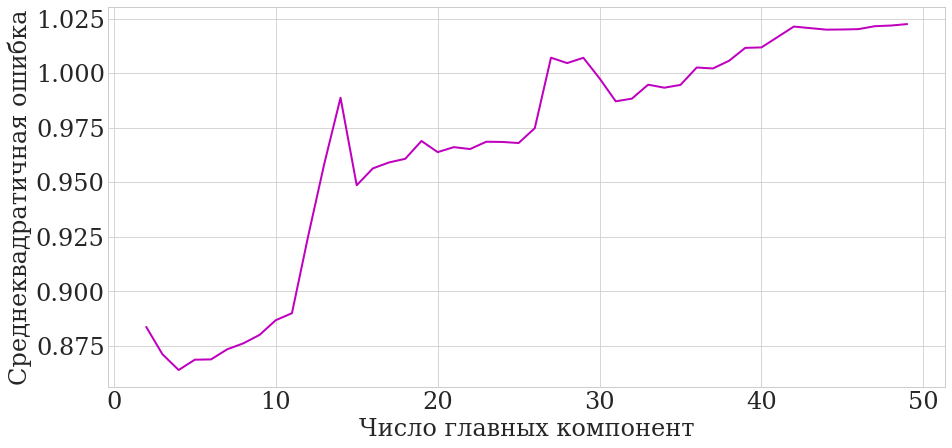

In [ ]:
plt.figure(figsize=(15,7))
# plt.title("Зависимость ошибки прогноза от числа компонент, независимые ряды")
plt.plot([n for n in range(2, 50)], ERROR2, c='m')
plt.xlabel("Число главных компонент")
plt.ylabel("Среднеквадратичная ошибка")
plt.savefig('ERROR2_new.png')
plt.show()

### Long walk

In [ ]:
acc_long = prepare_time_series('https://raw.githubusercontent.com/Intelligent-Systems-Phystech/Kurdyukova-BS-Thesis/master/code/data/Acc_long.csv')
gyr_long = prepare_time_series('https://raw.githubusercontent.com/Intelligent-Systems-Phystech/Kurdyukova-BS-Thesis/master/code/data/Gyr_long.csv')

acc_long = acc_long[500:2000]
gyr_long = gyr_long[500:2000]




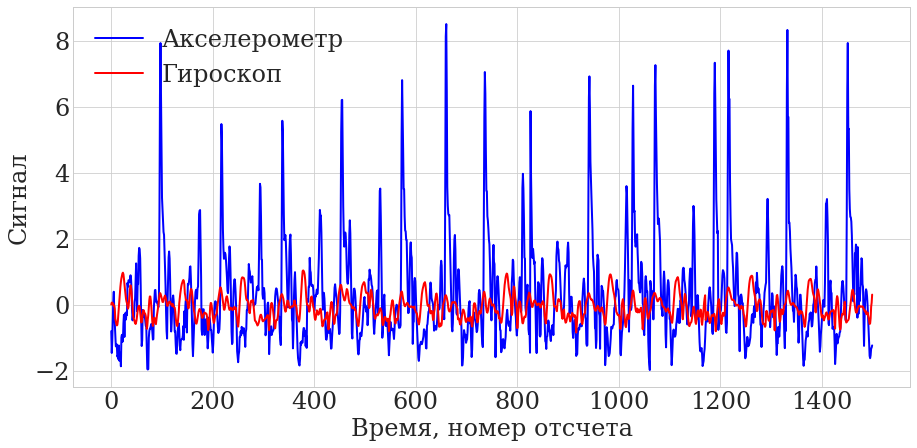

In [ ]:
plt.figure(figsize=(15,7))
# plt.title("Медленная ходьба raw")
plt.plot(np.arange(len(acc_long)), acc_long, label = 'Акселерометр', c='b')
plt.plot(np.arange(len(gyr_long)),gyr_long, label = 'Гироскоп', c='r')
plt.xlabel("Время, номер отсчета")
plt.ylabel("Сигнал")
plt.legend()
# plt.savefig('signal_long_new.png')
plt.show()

In [ ]:
# acc_long = acc_long[:550]
# gyr_long = gyr_long[:550]

acc_long = SSA(acc_long, 110).reconstruct(slice(0,5))
gyr_long = SSA(gyr_long, 110).reconstruct(slice(0,5))

scaler = StandardScaler()
scaled_data = scaler.fit_transform(np.hstack((acc_long[:, np.newaxis], gyr_long[:, np.newaxis])))

x = scaled_data[:, 0]
y = scaled_data[:, 1]


x_max = x.max()
x_min = x.min()

y_max = y.max()
y_min = y.min()

x = (x - x_min)/(x_max - x_min)
y = (y - y_min)/(y_max - y_min)

Hx = HankelMatrix(x, L=110)
Hy = HankelMatrix(y, L=110)

pca = PCA(n_components=3)
x_3d = pca.fit_transform(Hx)
y_3d = pca.fit_transform(Hy)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


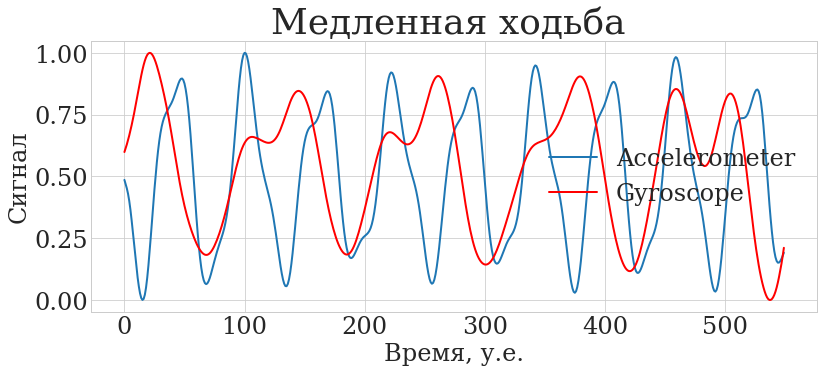

In [ ]:
plt.figure(figsize=(13,5))
plt.title("Медленная ходьба ")
plt.plot(np.arange(len(x)), x, label = 'Accelerometer')
plt.plot(np.arange(len(y)),y, label = 'Gyroscope', c='r')
plt.xlabel("Время, у.е.")
plt.ylabel("Сигнал")
plt.legend()
# plt.savefig('signal_long.png')
plt.show()

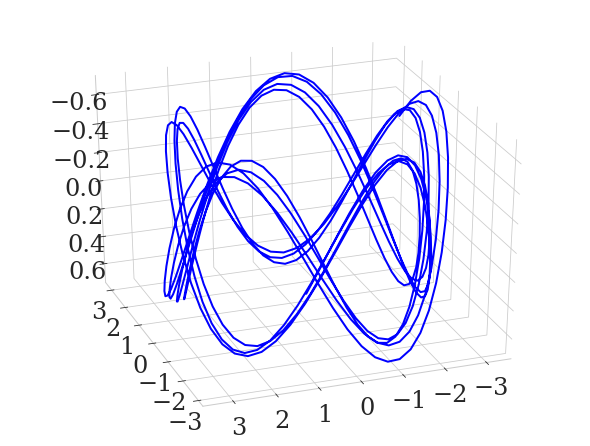

In [ ]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
# ax.scatter(x_3d[:, 0], x_3d[:, 1], x_3d[:, 2], cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.plot3D(x_3d[:, 0], x_3d[:, 1], x_3d[:, 2], c='b')
# ax.plot3D(x_mean[:, 1], x_mean[:, 0], x_mean[:, 2], c='r', linewidth=2)

# plt.savefig('acc_tr_2_new.png')

ax.set_facecolor((1.0, 1.0, 1.0))
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

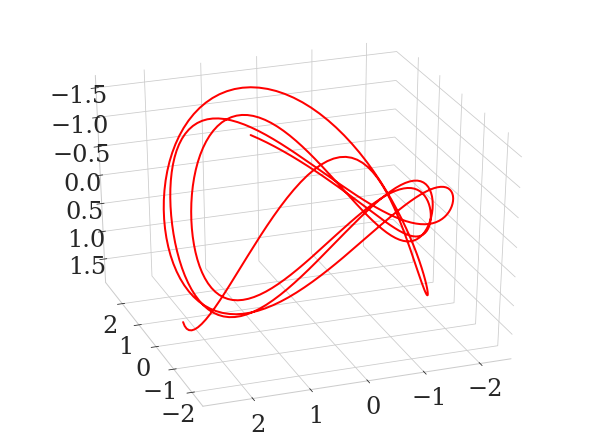

In [ ]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
# ax.scatter(x_3d[:, 0], x_3d[:, 1], x_3d[:, 2], cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.plot3D(y_3d[:, 1], y_3d[:, 0], y_3d[:, 2], c='r')
# ax.plot3D(x_mean[:, 1], x_mean[:, 0], x_mean[:, 2], c='r', linewidth=2)

# plt.savefig('gyr_tr_2_new.png')

ax.set_facecolor((1.0, 1.0, 1.0))
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

In [ ]:
x_train = HankelMatrix(x[:1000], 110)
y_train = HankelMatrix(y[:1000], 110)
x_test = HankelMatrix(x[1000:], 110)
y_test = HankelMatrix(y[1000:], 110)

In [ ]:
x = 

In [ ]:
pls = PLSRegression(n_components=30, max_iter=20000).fit(x_train, y_train)

In [ ]:
y_pred = pls.predict(x_test)
y_pred_ts = HankelMatrix_reverse(y_pred)

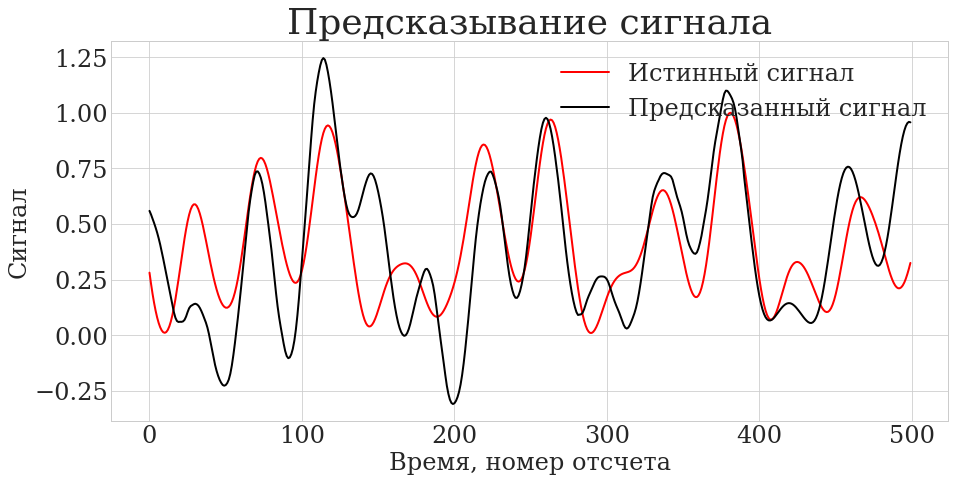

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Предсказывание сигнала")
plt.plot(np.arange(len(y[1000:])), y[1000:], label = 'Истинный сигнал', c='r')
plt.plot(np.arange(len(y_pred_ts)), y_pred_ts, label = 'Предсказанный сигнал', c='k')
plt.xlabel("Время, номер отсчета")
plt.ylabel("Сигнал")
# plt.legend(loc='upper right')
plt.savefig('long_pls_new.png')
plt.show()

Pearson -0.2282539791937494
Pearson 0.9192350915641992
Pearson 0.7380439577937244
Pearson -0.10193852564121121
Pearson 0.705137102130841
Pearson 0.8891703205933958
Pearson 0.9208371227503191
Pearson 0.9140860601861946
Pearson -0.24099449839493908
Pearson -0.39005156839222643


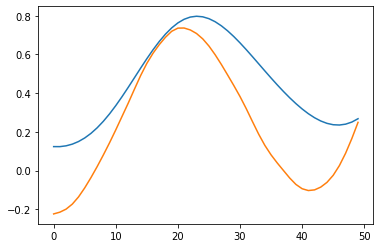

In [ ]:
for i in range(0, 500, 50):
  print('Pearson', np.corrcoef(y[1000+i:1000+i+50], y_pred_ts[i:i+50])[0][1])
# plt.plot(np.arange(len(y[1000+50:1000+100])), y[1000+50:1000+100], label = 'Истинный сигнал')
# plt.plot(np.arange(len(y_pred_ts[50:100])), y_pred_ts[50:100], label = 'Предсказанный сигнал')
# plt.savefig('2.png')

In [ ]:
len()

In [ ]:
for i in range(0, 500, 50):
  print('Spearman', spearmanr(y[1000+i:1000+i+50], y_pred_ts[i:i+50])[0])

Spearman -0.2388955582232893
Spearman 0.893109243697479
Spearman 0.662905162064826
Spearman -0.16120048019207683
Spearman 0.7414645858343337
Spearman 0.8250180072028811
Spearman 0.8555582232893156
Spearman 0.889939975990396
Spearman -0.021656662665066023
Spearman -0.3672989195678271


In [ ]:
mse(y[1000:], y_pred_ts)

0.06936806385828961

In [ ]:
MAPE(y[1000:], y_pred_ts)

131.73945196558816

# Бег

In [ ]:
mat_run = scipy.io.loadmat('data/acc_run.mat')['sensor_readings']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(np.hstack((mat_run[:, 0][:, np.newaxis], mat_run[:, 3][:, np.newaxis])))

x = scaled_data[:, 0]
y = scaled_data[:, 1]

x_max = x.max()
x_min = x.min()

y_max = y.max()
y_min = y.min()

x = (x - x_min)/(x_max - x_min)
y = (y - y_min)/(y_max - y_min)

In [ ]:
x_train = HankelMatrix(x[:1100], 200)
y_train = HankelMatrix(y[:1100], 200)
x_test = HankelMatrix(x[1100:], 200)
y_test = HankelMatrix(y[1100:], 200)

In [ ]:
pls = PLSRegression(n_components=30, max_iter=20000).fit(x_train, y_train)

In [ ]:
y_pred = pls.predict(x_test)
y_pred_ts = HankelMatrix_reverse(y_pred)

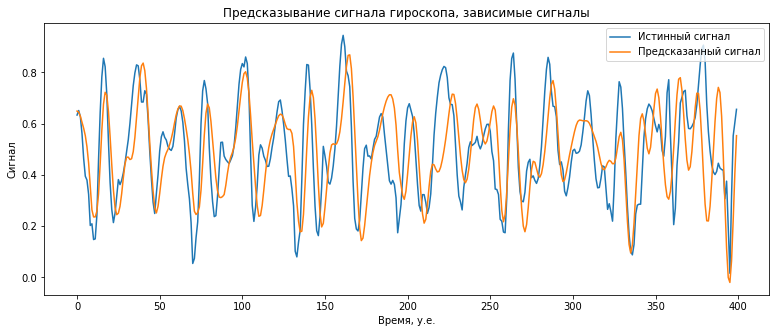

In [ ]:
plt.figure(figsize=(13,5))
plt.title("Предсказывание сигнала гироскопа, зависимые сигналы")
plt.plot(np.arange(len(y[1100:])), y[1100:], label = 'Истинный сигнал')
plt.plot(np.arange(len(y_pred_ts)), y_pred_ts, label = 'Предсказанный сигнал')
plt.xlabel("Время, у.е.")
plt.ylabel("Сигнал")
plt.legend(loc='upper right')
# plt.savefig('corr')
plt.show()

In [ ]:
for i in range(0, 400, 40):
  print('Pearson', np.corrcoef(y[1100+i:1100+i+40], y_pred_ts[i:i+40])[0][1])

Pearson 0.8018835223257664
Pearson 0.7545589868388319
Pearson 0.6581107870779856
Pearson 0.48882686742870884
Pearson 0.47675748979519583
Pearson 0.47223640111497617
Pearson 0.7081497931747365
Pearson 0.6768911402613413
Pearson 0.541287919823144
Pearson 0.36913773761873797


In [ ]:
for i in range(0, 400, 40):
  print('Spaerman', spearmanr(y[1100+i:1100+i+40], y_pred_ts[i:i+40])[0])

Spaerman 0.8086303939962478
Spaerman 0.7763966423476257
Spaerman 0.5080913744507903
Spaerman 0.5253776174730078
Spaerman 0.42138836772983124
Spaerman 0.48369998646016893
Spaerman 0.7204502814258912
Spaerman 0.7183864915572234
Spaerman 0.4839814255523684
Spaerman 0.2956848030018762


In [ ]:
mse(y[1100:], y_pred_ts)

0.027398546643962362

In [ ]:
MAPE(y[1100:], y_pred_ts)

33.86082846737525

# Быстрая ходьба

In [ ]:
acc_fast = prepare_time_series('https://raw.githubusercontent.com/Intelligent-Systems-Phystech/Kurdyukova-BS-Thesis/master/code/data/Acc_fast.csv')
gyr_fast = prepare_time_series('https://raw.githubusercontent.com/Intelligent-Systems-Phystech/Kurdyukova-BS-Thesis/master/code/data/Gyr_fast.csv')

acc_fast = acc_fast[500:1800]
gyr_fast = gyr_fast[500:1800]

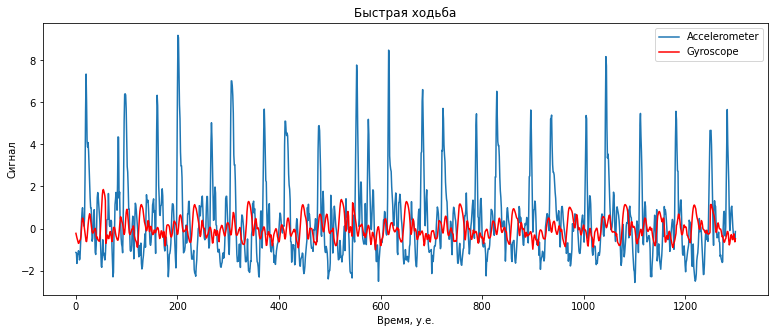

In [ ]:
plt.figure(figsize=(13,5))
plt.title("Быстрая ходьба")
plt.plot(np.arange(len(acc_fast)), acc_fast, label = 'Accelerometer')
plt.plot(np.arange(len(gyr_fast)),gyr_fast, label = 'Gyroscope', c='r')
plt.xlabel("Время, у.е.")
plt.ylabel("Сигнал")
plt.legend()
# plt.savefig('signal_long.png')
plt.show()

In [ ]:
acc_long = SSA(acc_long, 220).reconstruct(slice(0,5))
gyr_long = SSA(gyr_long, 220).reconstruct(slice(0,5))

scaler = StandardScaler()
scaled_data = scaler.fit_transform(np.hstack((acc_fast[:, np.newaxis], gyr_fast[:, np.newaxis])))

x = scaled_data[:, 0]
y = scaled_data[:, 1]

x_max = x.max()
x_min = x.min()

y_max = y.max()
y_min = y.min()

x = (x - x_min)/(x_max - x_min)
y = (y - y_min)/(y_max - y_min)



x_train = HankelMatrix(x[:800], 220)
y_train = HankelMatrix(y[:800], 220)
x_test = HankelMatrix(x[800:], 220)
y_test = HankelMatrix(y[800:], 220)



In [ ]:
pls = PLSRegression(n_components=30, max_iter=20000).fit(x_train, y_train)

In [ ]:
y_pred = pls.predict(x_test)
y_pred_ts = HankelMatrix_reverse(y_pred)

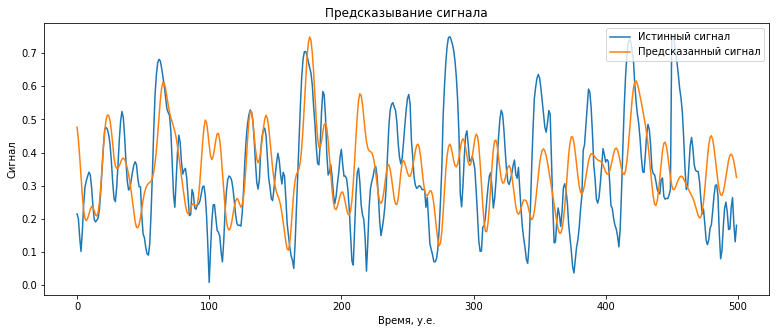

In [ ]:
plt.figure(figsize=(13,5))
plt.title("Предсказывание сигнала")
plt.plot(np.arange(len(y[800:])), y[800:], label = 'Истинный сигнал')
plt.plot(np.arange(len(y_pred_ts)), y_pred_ts, label = 'Предсказанный сигнал')
plt.xlabel("Время, у.е.")
plt.ylabel("Сигнал")
plt.legend(loc='upper right')
# plt.savefig('long_pls.png')
plt.show()

In [ ]:
for i in range(0, 500, 50):
  print('Pearson', np.corrcoef(x_acc[800+i:800+i+50], y_pred2_ts[i:i+50])[0][1])

Pearson -0.04655514746808847
Pearson 0.5269825827905593
Pearson -0.0383697158917287
Pearson -0.4385337499215008
Pearson 0.27235479261647977
Pearson -0.1817252906944857
Pearson -0.24204847739513097
Pearson -0.2935292150139593
Pearson -0.1029941935771551
Pearson 0.7419094034810173


In [ ]:
for i in range(0, 500, 50):
  print('Spearmanr', spearmanr(x_acc[800+i:800+i+50], y_pred2_ts[i:i+50])[0])

Spearmanr 0.037310924369747894
Spearmanr 0.4968547418967587
Spearmanr -0.07630252100840335
Spearmanr -0.5685954381752701
Spearmanr 0.21104441776710686
Spearmanr -0.22352941176470587
Spearmanr -0.287875150060024
Spearmanr -0.18175270108043215
Spearmanr 0.023193277310924368
Spearmanr 0.7425210084033613


In [ ]:
mse(y[800:], y_pred_ts)

0.024452992603829268

# Акселерометр + гироскоп сдвинутые сигналы

In [ ]:
mat_wlk = scipy.io.loadmat('data/acc_wlk.mat')['sensor_readings']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(np.hstack((mat_wlk[:, 0][:, np.newaxis], mat_wlk[:, 3][:, np.newaxis])))

x = scaled_data[:, 0]
y = scaled_data[:, 1]

# x = x[10:]
# y = y[:-10]

x_max = x.max()
x_min = x.min()

y_max = y.max()
y_min = y.min()

x = (x - x_min)/(x_max - x_min)
y = (y - y_min)/(y_max - y_min)

In [ ]:
for i in range(50, 500, 50):
  x_new = x[i:]
  y_new = y[:-i]

  x_train = HankelMatrix(x_new[:1800-i], 200)
  y_train = HankelMatrix(y_new[:1800-i], 200) 
  x_test = HankelMatrix(x_new[1800-i:], 200)
  y_test = HankelMatrix(y_new[1800-i:], 200)

  pls = PLSRegression(n_components=30, max_iter=20000).fit(x_train, y_train)

  y_pred = pls.predict(x_test)
  y_pred_ts = HankelMatrix_reverse(y_pred)

  print('mse:', mse(y_new[1800-i:], y_pred_ts), '\n')
  print(i)

mse: 0.005391747392774712 

50
mse: 0.00807667564150033 

100
mse: 0.008581342838766805 

150
mse: 0.009370578299686875 

200
mse: 0.009748986715335391 

250
mse: 0.011757247384834987 

300
mse: 0.011780922661668119 

350
mse: 0.012595426947981735 

400
mse: 0.015223107912555864 

450
